# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [230]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats

In [16]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [193]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

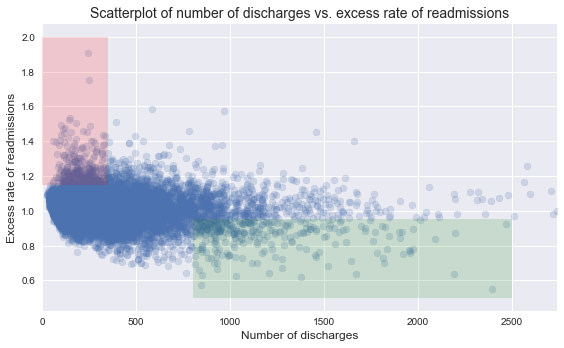

In [194]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [195]:
# Your turn

Comparing the analysis of Statistics

# Exercise
Include your work on the following in this notebook and submit to your Github account.
## A. Do you agree with the above analysis and recommendations? Why or why not?

No, the analysis does not clearly support the recommendations/conclusions. The main problem is that the report fails to clearly establish the basis to compare Excess Readmission Rate between smaller hospitals and larger hospitals. The report takes at face value the sample mean of both populations without understanding the underlying distribution effect of uncertainity. A bad sampling then could easily lead us to make poor recommendations.

Most of the data points are also missed by the classification of small hospitals being less than 100 and larger hospitals greater than 1000. The recommendations then uses the result from these groups to apply policy to hospitals less 300.  

The initial obserbations based on the scatterplot are ill-supported. The trend of the data is not clear from this graph. A regression line could help highlight this. The color highlighted portions seems to be asking us to compare the two regions against each other, but the information the report is trying to highlight is not clear. The observations they make, which might be true, are not clearly conveyed from the graph.The statistics they provide contain errors. Hence, the conclusion and recommendations seem questionable. 


## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

    Setup an appropriate hypothesis test.
    Compute and report the observed significance value (or p-value).
    Report statistical significance for  α = .01.
    Discuss statistical significance and practical significance. Do they differ here? 
    How does this change your recommendation to the client?
    Look at the scatterplot above.
    What are the advantages and disadvantages of using this plot to convey information?
    Construct another plot that conveys the same information in a more direct manner.

The heart of the analysis the report tried to address is rather small hospitals perform as well as large hospitals based upon the Excess Readmission Rate. We will first look at the distribution for the mean of both the small and large hospitals. We will then be in a position to look at the difference between the means. Once we have these figures in hand, we should be able to speak more clearly on rather the data tells us if there is a statistical justification for our recommendations and conclusions. 

First, we define small hospitals/facilites as 1000 discharges or less and large hospitals/facilites as greater than 1000. We will then calculate some basic statistics for each group, compute a two-sample bootstrap test, a two sample t-test, discuss statistcall significance and pratical signigicance, plot our own grapcic, and summarize the report. 



In [419]:
#variable for small discharge hospitals
small_discharges=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 1000]

#mean of small discharge hospitals
mean_err_sh=np.mean(small_discharges['Excess Readmission Ratio'])

#percent that have excess readmission rate greater than 1 in small discharge hospitals
pct_err_sh=( (small_discharges['Excess Readmission Ratio']>1.0).sum()/float(small_discharges['Number of Discharges'].count()) )*100

#variable for large discharge hospitals, those with discharges greater than 1000
large_discharges=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

#mean of ERR for large discharge hospitals
mean_err_lh=np.mean(large_discharges['Excess Readmission Ratio'])

#percent that have excess readmission rate greater than 1 in large discharge hospitals
pct_err_lh=( (large_discharges['Excess Readmission Ratio']>1).sum()/float((large_discharges['Excess Readmission Ratio']>1).count()) )*100



In [413]:
small_discharges_err.describe()

count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64

In [414]:
large_discharges_err.describe()

count    463.000000
mean       0.978335
std        0.120007
min        0.549500
25%        0.907900
50%        0.986400
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64

Lets see if the population resemble a normal distribution.

In [223]:
#datacamp code for ecdf
def ecdf(data):
    """ Compute Empirical Cumulative Distribution Functions for an array of 1 dimensional elements
    """
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.linspace(1./n,1,n)
    return x,y

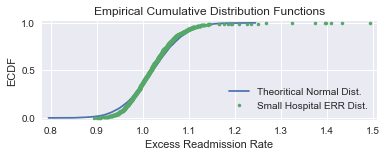

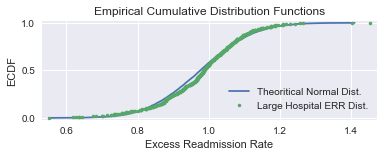

In [432]:
plt.subplot(2,1,1)
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(1.022618,0.057979,size=10000)

# Get the CDF of the samples and of the data
x_theory , y_theory = ecdf(samples)
x1 , y1 = ecdf(small_discharges_err)


# Plot the CDFs and show the plot
sns.set()
_ = plt.plot(x_theory, y_theory,label='Theoritical Normal Dist.')
_ = plt.plot(x1, y1, marker='.', linestyle='none',label='Small Hospital ERR Dist.')

plt.margins(0.02)

_ = plt.xlabel('Excess Readmission Rate')
_ = plt.ylabel('ECDF')
_ = plt.legend(loc=4)
_ = plt.title('Empirical Cumulative Distribution Functions')

plt.show()
plt.subplot(2,1,2)
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(0.978335,0.120007,size=10000)

# Get the CDF of the samples and of the data
x_theory , y_theory = ecdf(samples)
x2 , y2 = ecdf(large_discharges_err)


# Plot the CDFs and show the plot
sns.set()
_ = plt.plot(x_theory, y_theory,label='Theoritical Normal Dist.')
_ = plt.plot(x2, y2, marker='.', linestyle='none',label='Large Hospital ERR Dist.')

plt.margins(0.02)

_ = plt.xlabel('Excess Readmission Rate')
_ = plt.ylabel('ECDF')
_ = plt.legend(loc=4)
_ = plt.title('Empirical Cumulative Distribution Functions')

plt.show()

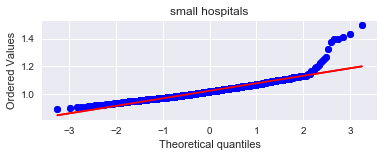

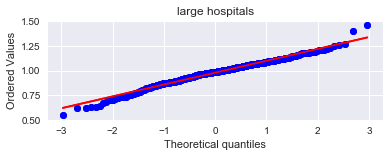

In [416]:
plt.subplot(2,1,1)
obs1 = np.random.normal(1.022618,0.057979,size=len(x1))/len(x1)
z = (obs1-np.mean(obs1))/np.std(obs1)
res=stats.probplot(x1, plot=plt)
stats.probplot(x1,plot=plt)
plt.title('small hospitals')
plt.show()

plt.subplot(2,1,2)
obs2 = np.random.normal(0.978335,0.120007,size=len(x2))/len(x2)
z = (obs2-np.mean(obs2))/np.std(obs2)
res=stats.probplot(x2, plot=plt)
stats.probplot(x2, plot=plt)
plt.title('large hospitals')
plt.show()

We see in the ecdf and quantile charts that it is reasonable to assume that the population of small and large hospitals ERR rates can be approximated by a normal distribution. Next lets look at the confidence and histograms of each population.

In [272]:
#DataCamp Thinking Statistically Course function
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)
    
    return diff



In [274]:
#datacamp functions
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

('99% confidence interval =', array([ 0.89806995,  1.3286565 ]), 'Small Hospitals')


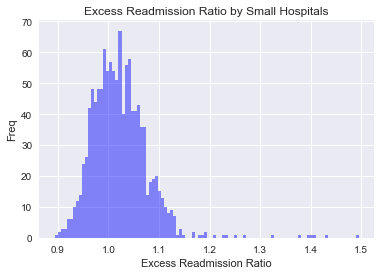

In [422]:

_= plt.hist(small_discharges_err,bins=100,color='blue', alpha = .45,label='large hospitals')
_= plt.xlabel('Excess Readmission Ratio')
_= plt.ylabel('Freq')
_= plt.title('Excess Readmission Ratio by Small Hospitals')


# Compute the 99% confidence interval: conf_int
conf_int = np.percentile(small_discharges_err,[.05,99.5])

# Print the confidence interval
print('99% confidence interval =', conf_int, 'Small Hospitals')

('99% confidence interval =', array([ 0.56567 ,  1.261978]), 'Large Hospitals')


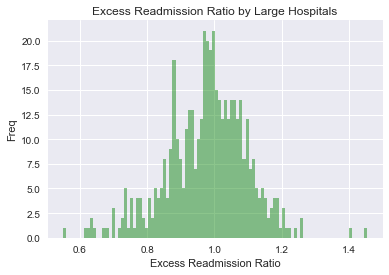

In [424]:

_= plt.hist(large_discharges_err,bins=100,color='green', alpha = .45,label='large hospitals')
_= plt.xlabel('Excess Readmission Ratio')
_= plt.ylabel('Freq')
_= plt.title('Excess Readmission Ratio by Large Hospitals')


# Compute the 99% confidence interval: conf_int
conf_int = np.percentile(large_discharges_err,[.05,99.5])

# Print the confidence interval
print('99% confidence interval =', conf_int, 'Large Hospitals')

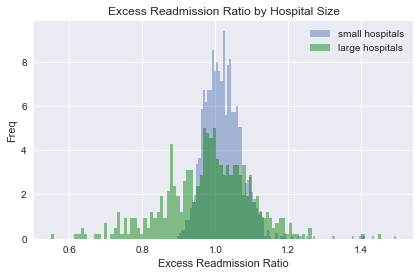

In [426]:

# Plot the histogram on top of each other

_= plt.hist(x=small_discharges_err,bins=100,normed=True,alpha = .45,label='small hospitals')
_= plt.xlabel('Excess Readmission Ratio')
_= plt.ylabel('Freq')
_= plt.title('Excess Readmission Ratio by Hospital Size')
_= plt.hist(large_discharges_err,bins=100,normed=True,color='green', alpha = .45,label='large hospitals')
_= plt.legend()
# Show histogram
plt.tight_layout()
plt.show()

#_= plt.legend()

Now lets test our hypothesis with both bootstrap and a t-test.

('p-value =', 0.0)
('99% confidence interval =', array([-0.01871198,  0.01498469]), 'two sample bootstrap test')
('empirical difference in means', 0.030395105435699454)


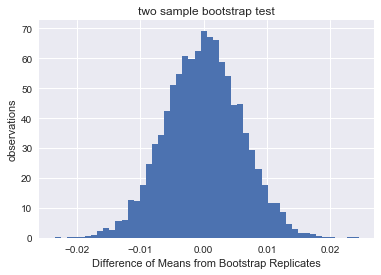

In [427]:
#a two sample bootstrap test

#Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(mean_err_sh,mean_err_lh)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((small_discharges_err,large_discharges_err))

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
small_discharges_err_shifted = small_discharges_err - np.mean(small_discharges_err) + mean_force
large_discharges_err_shifted = large_discharges_err - np.mean(large_discharges_err) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_s = draw_bs_reps(small_discharges_err_shifted , np.mean, 10000)
bs_replicates_l = draw_bs_reps(large_discharges_err_shifted , np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_s - bs_replicates_l

# Compute and print p-value: p
p = np.sum(bs_replicates>=empirical_diff_means) / float(len(bs_replicates))
print('p-value =', p)

# Compute the 90% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[.05,99.5])

# Print the confidence interval
print('99% confidence interval =', conf_int, 'two sample bootstrap test')
print("empirical difference in means", empirical_diff_means)
# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'Difference of Means from Bootstrap Replicates')
_ = plt.ylabel('observations')
_ = plt.title('two sample bootstrap test')

# Show the plot
plt.show()

In [428]:
#a t test (verifies the same as the bootsrap test)
stats.ttest_ind(small_discharges_err,large_discharges_err)

Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)

The p-value is extremely small, and the empirircal difference in means is way out on the right tail. This tells us that seeing an difference this large between these groups should be extremely unlikely if the means were the same. We can be confident in rejecting the null hypothesis that small and large hospitals have the same mean Excess Readmission Rate. 

We have shown that it is statistical significant that the means are these two population are different that is that the p-value 0.0 is below the alpha level or assumed level of confidence 0.01. We have only showed that the mean of the small and large hospitals/facilities are not the same.

How practically significant is this result? This is more subjective. Do we think that the difference in the two population Excess Readmission Rates calls for policy implementation? Is the difference between the two reason to be concerned. Should we think the EER rate should be similiar for small and large hospitals?

Many small hospitals are the only option for rural regions of the United States for many miles. Large Metropolitan areas usually have many large hospitals for patients to choose from in a small area. If patients are unhappy with the service of a large hopital there are usually another facility they can be admitted too. This is often not the case with small hospitals in rural regions. We therefore should expect a slightly higher EER rate at small hospitals. Medicare uses the EER to adjust payments and therefore could be putting additional strain on these smaller facilities to provide adequate care. 


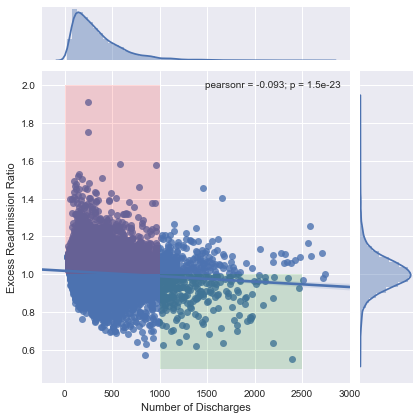

In [429]:
sns.jointplot(clean_hospital_read_df['Number of Discharges'][81:-3],clean_hospital_read_df['Excess Readmission Ratio'][81:-3], data=clean_hospital_read_df, kind='reg')

plt.fill_between([0,1000], 1.0, 2, facecolor='red', alpha = .15, interpolate=True)
plt.fill_between([1000,2500], .5, 1.0, facecolor='green', alpha = .15, interpolate=True)

#plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

#ax.grid(True)
fig.tight_layout()

The Pearson correlation coefficient measures the linear relationship between two datasets. It varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. 

Thus our graph shows that there does exist a negative correlation between ERR and Discharge numbers, that is that as discharges increase the ERR decreases. The low p-values show that this trend would not likely be replicated by uncorrelated  variables. 

Note however that correlation does not constitute causation. In fact at larger facilities more resources are available to include speciality care/speciality doctors. Reducing smaller hospitals that serve remote locations could deny care to some patients who would not be treated otherwise. This recommendation might improve the ERR of smaller facilities but at the cost of treating patients. 

Summary Report:

A. Initial observations based on the plot above

Overall, rate of readmissions is trending down with increasing number of discharges

With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

B. Statistics

In hospitals/facilities with number of discharges <= 1000 mean excess readmission rate is 1.009  and 52% have excess readmission rate greater than 1

In hospitals/facilities with number of discharges > 1000 mean excess readmission rate is 0.978  and 44% have excess readmission rate greater than 1

The difference is 0.030 between the mean of the two hospital populations and is statistically signaficant to not assume the populations have the same mean.

Conclusions:
There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

D. Regulatory policy recommendations
Hospitals/facilties with large capacity (> 1000) and high Excess Readmission Rates should be required to demonstrate upgraded resource allocation for quality care to continue operation.

Directives and incentives should be provided for funding and resourcing smaller hospitals and facilities to improve quality care or increasing of capacity.

Smaller hospitals/facilites with high ERR located near larger hospitals/facilites should be required to demonstarte upgraded resource allocation for quality care to continue operation.
